# Introduction to computer vision


Install open cv and scikit-image packages

There is several ways to load an image. The name of the function is usually imread. The function 

In [11]:
import numpy as np

In [ ]:
import cv2

img = cv2.imread('path/to/image') #will load the image as BGR if colored. WARNING RETURNS NONE IS FILE OR PATH DO NOT EXIST

import skimage.io as io

img = io.imread('path/to/image') # will load image  as RGB. Error if file or path do not exist



Display its type, what it is ? Surprise ! (Remark : if the loading fails, opencv returns None). Remark, you can also load it with skimage (io module)

In [6]:
bgr_img = cv2.imread('grumpy.jpg')
bgr_img.shape

(183, 275, 3)

As said previously, the image are loaded as numpy array (3D for colored images), (2D for grey images). Each value reprent the intensity of the pixel

In [4]:
cv2.imshow("grumpy", bgr_img)
cv2.waitKey(0) #will display the image as external windows

-1

You can also display the image with matplotlib. But beware, the image must be RGB. So you **may** need to convert it from BGR depending on how you load it. 

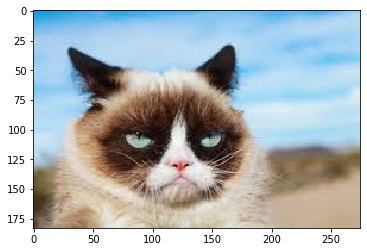

In [8]:
import matplotlib.pyplot as plt
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)


How can you convert a colorful image in grey and black. Do it and store the result in *gimg* variable

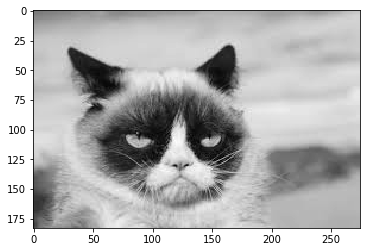

In [9]:
gimg = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gimg, cmap="gray")

Actually to convert a color image to a gray one, you just have to compute the average accross channels

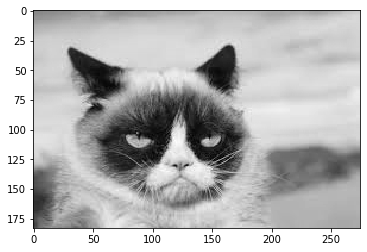

In [12]:
gimg2 = np.mean(img, axis=2)
plt.imshow(gimg2, cmap="gray")

What is the resulting size ?

In [13]:
gimg.shape

(183, 275)

As previously said, the grey img is a 2D array

Change the values of the all the pixels in the rows 4 to 10 and set it to 0. Display the image

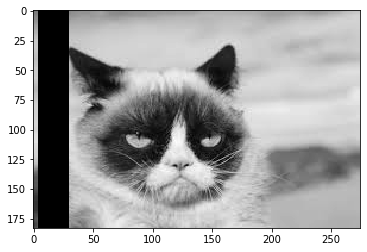

In [14]:
gimg[:, 4:30] = 0
plt.imshow(gimg, cmap="gray")

Here we directly modified the value of the image and we can see it on the picture. 0 represents no intensity = black. 255 represent full intensity (White (or the corresponding color for RGB))


Find how to display the image histogram and display it. What does it represent ? 

Histogram represent the distribution of pixel intensenties : it shows if there are a lot of pixels with high, medium or low intensities : it just give other informations about the images.

In [25]:
img_after_ravel = gimg.ravel() #convert array to vector
vector_img = gimg.reshape(-1) # do the same

img_after_ravel.shape, vector_img.shape, 183 * 275, gimg.shape

((50325,), (50325,), 50325, (183, 275))

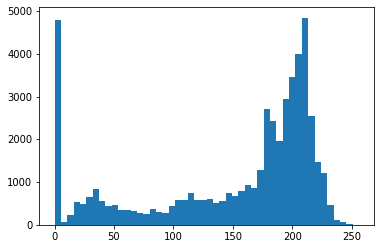

In [16]:
import numpy as np

v = plt.hist(gimg.ravel(), 'auto', [0, 256])

The big peak at 0 is due because we modified the image and added a black strip

What is histogram equalization ? Do it with open cv and display the result. What did it do ? 

Histogram equalization is an image processing algorithm which increase the contrast of an image by equalizint the histogram

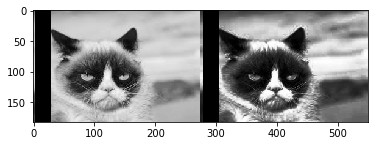

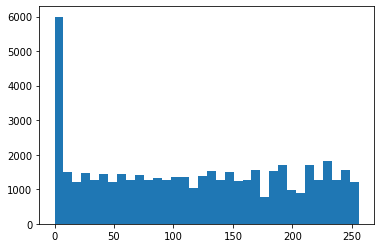

In [18]:
equalized =  cv2.equalizeHist(gimg)
both = np.hstack((gimg, equalized))
plt.imshow(both, cmap="gray")
plt.show()
v = plt.hist(equalized.ravel(), 'auto', [0, 256])

We can see that the histogram is more even after equalization (the black strip still messes around everything)

# CONVOLUTIONS

What is a 2D convolution ? Find how you can apply a 2D convolution with open CV. Compute the convolution of the original image with the filter [[1, 1, 1], [1, 1, 1], [1, 1, 1]] and display the result. What did it do ? 

**Convolutions** ARE A VERY IMPORTANT CONCEPT IN IMAGE PROCESSING ! It is used to clean images or to transform them to display informations which can be interesting. The basic idea is to define a matrix of weight which will be used to compute local averages on the image. Depending on the weights you choose the result are different. 

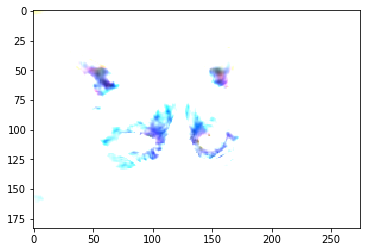

In [22]:
conv_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
convolued_img = cv2.filter2D(
    bgr_img, 
    -1,  #says that it is applied to all channels
    conv_filter)
plt.imshow(convolued_img)

Here it does not work because we do not have a normalized matrix. So we can have a lot of pixel with value over 255 (white). Let's correct that

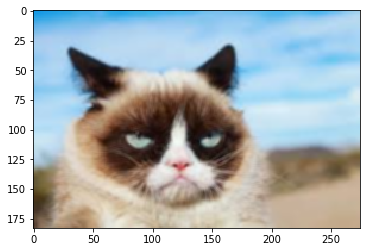

In [24]:
conv_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
convolued_img = cv2.filter2D(rgb_img, -1,  conv_filter)
plt.imshow(convolued_img)

The image is more blurry. You can see it more if you apply the filter several times

Try with different matrices. 

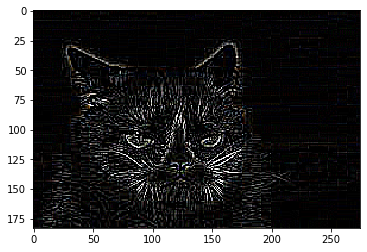

In [21]:
conv_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
convolued_img = cv2.filter2D(img, -1,  conv_filter)
plt.imshow(convolued_img)

Here we used a weight which allows to compute the edge of a picture. 